# Reading all the required libraries for plots/eda/model build/testing

In [39]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing as hwes
import matplotlib.pyplot as plt

# Importing the data

In [50]:
df = pd.read_csv("D:\Github_projects\Time Series- Sarima\MonthlyTemperatureData.csv")
df.rename(columns={'dt':'Month','LandAverageTemperature':'Temp'}, inplace=True)
print(df.dtypes)
df['Month']=pd.to_datetime(df['Month'])
print(df.dtypes)
df

Month     object
Temp     float64
dtype: object
Month    datetime64[ns]
Temp            float64
dtype: object


,Month,Temp
0,2000-01-01,2.950
1,2000-02-01,4.184
2,2000-03-01,6.219
3,2000-04-01,9.552
4,2000-05-01,11.874
...,...,...
187,2015-08-01,14.755
188,2015-09-01,12.999
189,2015-10-01,10.801
190,2015-11-01,7.433


## Visual inspection of the data

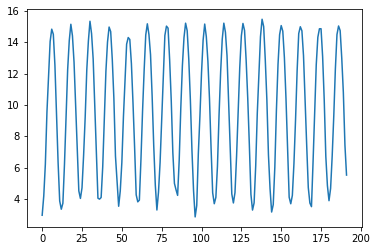

In [41]:
plt.plot(df.Temp)
#The data does not show a distinct trend component, but a clear seasonal pattern

# Building the model

### Splitting the model in train and test data


In [51]:
df.index = pd.DatetimeIndex(df.index)
train_df = df[(df.Month > "2010-12-31") & (df.Month < "2014-12-31")]
test_df = df[df.Month > "2014-12-31"]
train_df = train_df.Temp
test_df = test_df.Temp
print(train_df)
print(test_df)

1970-01-01 00:00:00.000000132     3.282
1970-01-01 00:00:00.000000133     3.743
1970-01-01 00:00:00.000000134     6.101
1970-01-01 00:00:00.000000135     9.483
1970-01-01 00:00:00.000000136    11.986
1970-01-01 00:00:00.000000137    14.370
1970-01-01 00:00:00.000000138    15.482
1970-01-01 00:00:00.000000139    15.012
1970-01-01 00:00:00.000000140    12.912
1970-01-01 00:00:00.000000141    10.352
1970-01-01 00:00:00.000000142     6.814
1970-01-01 00:00:00.000000143     4.655
1970-01-01 00:00:00.000000144     3.157
1970-01-01 00:00:00.000000145     3.628
1970-01-01 00:00:00.000000146     6.023
1970-01-01 00:00:00.000000147     9.676
1970-01-01 00:00:00.000000148    12.590
1970-01-01 00:00:00.000000149    14.492
1970-01-01 00:00:00.000000150    15.076
1970-01-01 00:00:00.000000151    14.720
1970-01-01 00:00:00.000000152    13.040
1970-01-01 00:00:00.000000153    10.428
1970-01-01 00:00:00.000000154     7.156
1970-01-01 00:00:00.000000155     4.102
1970-01-01 00:00:00.000000156     3.685


### Training the model

In [52]:
# We need to select between additive and multiplicative model for both trend and seasonality. The data does not show a lot of
#variation in trend(in fact there may not be any trend, hence to begin with let's keep it as "none". 
#Seasonality is present but does not show variation over time, let's start with additive seasonality

model = hwes(train_df, trend = None, seasonal = "add", seasonal_periods = 12)
model_fit = model.fit()

print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Temp   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                              2.116
Optimized:                         True   AIC                           -121.851
Trend:                             None   BIC                            -95.654
Seasonal:                      Additive   AICC                          -104.303
Seasonal Periods:                    12   Date:                 Sun, 14 Nov 2021
Box-Cox:                          False   Time:                         20:12:38
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4901e-08                alpha                 True
smoothing_seasonal       

C:\Users\Tanya\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


### Forecasting and visually inspecting the forecast with actuals

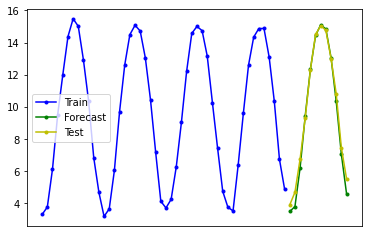

In [53]:
forecast = model_fit.forecast(steps = 12)
forecast_mod = pd.Series(forecast, index = test_df.index)
Train, = plt.plot(train_df, 'b.-', label='Train')
Forecast, = plt.plot(test_df.index,forecast_mod, 'g.-', label='Forecast')
Test, = plt.plot(test_df, 'y.-', label='Test')
plt.legend(handles=[Train, Forecast, Test])
plt.show()

## Model Accuracy Measurement

### MAPE Calculation

In [57]:
comparison = pd.concat([df[df.Month>"2014-12-31"],forecast_mod], axis = 1)
comparison.rename(columns={0:'Predicted'}, inplace=True)
print(comparison)
mape = np.mean(np.abs(test_df-forecast_mod)/np.abs(test_df))
print(mape)

## We get a mape of 5%, meaning the model has a high accuracy of 95%(believable because the data is fairly simple to model)

                                   Month    Temp  Predicted
1970-01-01 00:00:00.000000180 2015-01-01   3.881   3.463947
1970-01-01 00:00:00.000000181 2015-02-01   4.664   3.773255
1970-01-01 00:00:00.000000182 2015-03-01   6.740   6.190715
1970-01-01 00:00:00.000000183 2015-04-01   9.313   9.448033
1970-01-01 00:00:00.000000184 2015-05-01  12.312  12.338061
1970-01-01 00:00:00.000000185 2015-06-01  14.505  14.441215
1970-01-01 00:00:00.000000186 2015-07-01  15.051  15.108354
1970-01-01 00:00:00.000000187 2015-08-01  14.755  14.837256
1970-01-01 00:00:00.000000188 2015-09-01  12.999  13.049256
1970-01-01 00:00:00.000000189 2015-10-01  10.801  10.341486
1970-01-01 00:00:00.000000190 2015-11-01   7.433   7.026587
1970-01-01 00:00:00.000000191 2015-12-01   5.518   4.582926
0.056740321220178636
